# claudette

> Claudette is Claude's friend

In [ ]:
#| hide

from nbdev import show_doc
from fastcore.utils import *
from IPython import display

> **NB**: If you are reading this in GitHub's readme, we recommend you instead read the much more nicely formatted [documentation format](https://claudette.answer.ai/) of this tutorial.

*Claudette* is a wrapper for Anthropic's [Python SDK](https://github.com/anthropics/anthropic-sdk-python).

The SDK works well, but it is quite low level -- it leaves the developer to do a lot of stuff manually. That's a lot of extra work and boilerplate! Claudette automates pretty much everything that can be automated, whilst providing full control. Amongst the features provided:

- A `Chat` class that creates stateful dialogs
- Support for *prefill*, which tells Claude what to use as the first few words of its response
- Convenient image support
- Simple and convenient support for Claude's new Tool Use API.

You'll need to set the `ANTHROPIC_API_KEY` environment variable to the key provided to you by Anthropic in order to use this library.

Note that this library is the first ever "literate nbdev" project. That means that the actual source code for the library is a rendered Jupyter Notebook which includes callout notes and tips, HTML tables and images, detailed explanations, and teaches *how* and *why* the code is written the way it is. Even if you've never used the Anthropic Python SDK or Claude API before, you should be able to read the source code. Click [Claudette's Source](https://claudette.answer.ai/core.html) to read it, or clone the git repo and execute the notebook yourself to see every step of the creation process in action. The tutorial below includes links to API details which will take you to relevant parts of the source. The reason this project is a new kind of literal program is because we take seriously Knuth's call to action, that we have a "*moral commitment*" to never write an "*illiterate program*" -- and so we have a commitment to making literate programming and easy and pleasant experience. (For more on this, see [this talk](https://www.youtube.com/watch?v=rX1yGxJijsI) from Hamel Husain.)

> "*Let us change our traditional attitude to the construction of programs: Instead of imagining that our main task is to instruct a **computer** what to do, let us concentrate rather on explaining to **human beings** what we want a computer to do.*" Donald E. Knuth, [Literate Programming](https://www.cs.tufts.edu/~nr/cs257/archive/literate-programming/01-knuth-lp.pdf) (1984)

## Install

```sh
pip install claudette
```

## Getting started

Anthropic's Python SDK will automatically be installed with Claudette, if you don't already have it.

In [ ]:
import os
# os.environ['ANTHROPIC_LOG'] = 'debug'

To print every HTTP request and response in full, uncomment the above line.

In [ ]:
from claudette import *

Claudette only exports the symbols that are needed to use the library, so you can use `import *` to import them. Alternatively, just use:

```python
import claudette
```

...and then add the prefix `claudette.` to any usages of the module.

Claudette provides `models`, which is a list of models currently available from the SDK.

In [ ]:
models

('claude-3-opus-20240229',
 'claude-3-5-sonnet-20240620',
 'claude-3-haiku-20240307')

For these examples, we'll use Sonnet 3.5, since it's awesome!

In [ ]:
model = models[1]

## Chat

The main interface to Claudette is the `Chat` class, which provides a stateful interface to Claude:

In [ ]:
chat = Chat(model, sp="""You are a helpful and concise assistant.""")
chat("I'm Jeremy")

Hello Jeremy, it's nice to meet you. How can I assist you today?

<details>

- id: `msg_01WUaYx8YVsxPX5YtjYkyEF7`
- content: `[{'text': "Hello Jeremy, it's nice to meet you. How can I assist you today?", 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 19, 'output_tokens': 20, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

In [ ]:
r = chat("What's my name?")
r

Your name is Jeremy, as you just told me.

<details>

- id: `msg_01TBJC55GiRs5fq1mKRhyhxZ`
- content: `[{'text': 'Your name is Jeremy, as you just told me.', 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 47, 'output_tokens': 14, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

As you see above, displaying the results of a call in a notebook shows just the message contents, with the other details hidden behind a collapsible section. Alternatively you can `print` the details:

In [ ]:
print(r)

Message(id='msg_01TBJC55GiRs5fq1mKRhyhxZ', content=[TextBlock(text='Your name is Jeremy, as you just told me.', type='text')], model='claude-3-5-sonnet-20240620', role='assistant', stop_reason='end_turn', stop_sequence=None, type='message', usage=In: 47; Out: 14; Total: 61)


Claude supports adding an extra `assistant` message at the end, which contains the *prefill* -- i.e. the text we want Claude to assume the response starts with. Let's try it out:

In [ ]:
chat("Concisely, what is the meaning of life?",
     prefill='According to Douglas Adams,')

According to Douglas Adams,  "42." More seriously, it's often considered to be finding personal fulfillment, happiness, and purpose.

<details>

- id: `msg_01QbBGFJcX4NzUqS4cGPnXbu`
- content: `[{'text': 'According to Douglas Adams,  "42." More seriously, it\'s often considered to be finding personal fulfillment, happiness, and purpose.', 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 81, 'output_tokens': 27, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

You can add `stream=True` to stream the results as soon as they arrive (although you will only see the gradual generation if you execute the notebook yourself, of course!)

In [ ]:
for o in chat("Concisely, what book was that in?", prefill='It was in', stream=True):
    print(o, end='')

It was in "The Hitchhiker's Guide to the Galaxy" by Douglas Adams.

### Async

Alternatively, you can use `AsyncChat` (or `AsyncClient`) for the async versions, e.g:

In [ ]:
chat = AsyncChat(model)
await chat("I'm Jeremy")

Hello Jeremy! It's nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?

<details>

- id: `msg_015H4DsD8q4hhts7bs7LxaCQ`
- content: `[{'text': "Hello Jeremy! It's nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?", 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 10, 'output_tokens': 36, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

Remember to use `async for` when streaming in this case:

In [ ]:
async for o in await chat("Concisely, what is the meaning of life?",
                          prefill='According to Douglas Adams,', stream=True):
    print(o, end='')

According to Douglas Adams,  the meaning of life is 42. More seriously, there's no universally agreed upon answer. Common perspectives include:

1. Finding personal happiness and fulfillment
2. Serving others or a higher purpose
3. Creating meaning through our choices and actions
4. Experiencing and appreciating existence
5. Evolving and growing as individuals and as a species

Ultimately, many believe each person must define their own meaning of life.

## Prompt caching

If you use `mk_msg(msg, cache=True)`, then the message is cached using Claude's [prompt caching](https://docs.anthropic.com/en/docs/build-with-claude/prompt-caching) feature. For instance, here we use caching when asking about Claudette's readme file:

In [ ]:
chat = Chat(model, sp="""You are a helpful and concise assistant.""")

In [ ]:
nbtxt = Path('README.txt').read_text()
msg = f'''<README>
{nbtxt}
</README>
In brief, what is the purpose of this project based on the readme?'''
r = chat(mk_msg(msg, cache=True))
r

Based on the readme, the main purpose of the Claudette project is to provide a high-level wrapper around Anthropic's Python SDK for interacting with Claude AI models. Key features and goals include:

1. Automating and simplifying interactions with Claude, reducing boilerplate code.

2. Providing a stateful dialog interface through the `Chat` class.

3. Supporting features like prefill (specifying the start of Claude's response) and image handling.

4. Offering convenient support for Claude's Tool Use API.

5. Serving as an example of "literate programming", with the source code designed to be readable and educational, including explanations of how and why the code is written.

6. Supporting multiple model providers, including direct Anthropic API access as well as Claude models available through Amazon Bedrock and Google Vertex AI.

The project aims to make working with Claude models more convenient and accessible for developers while also serving as an educational resource on how to effectively use and interact with these AI models.

<details>

- id: `msg_01HkjoKjfY5zrmBrkjHvtDpG`
- content: `[{'text': 'Based on the readme, the main purpose of the Claudette project is to provide a high-level wrapper around Anthropic\'s Python SDK for interacting with Claude AI models. Key features and goals include:\n\n1. Automating and simplifying interactions with Claude, reducing boilerplate code.\n\n2. Providing a stateful dialog interface through the `Chat` class.\n\n3. Supporting features like prefill (specifying the start of Claude\'s response) and image handling.\n\n4. Offering convenient support for Claude\'s Tool Use API.\n\n5. Serving as an example of "literate programming", with the source code designed to be readable and educational, including explanations of how and why the code is written.\n\n6. Supporting multiple model providers, including direct Anthropic API access as well as Claude models available through Amazon Bedrock and Google Vertex AI.\n\nThe project aims to make working with Claude models more convenient and accessible for developers while also serving as an educational resource on how to effectively use and interact with these AI models.', 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 4, 'output_tokens': 220, 'cache_creation_input_tokens': 7171, 'cache_read_input_tokens': 0}`

</details>

The response records the a cache has been created using these input tokens:

In [ ]:
print(r.usage)

Usage(input_tokens=4, output_tokens=220, cache_creation_input_tokens=7171, cache_read_input_tokens=0)


We can now ask a followup question in this chat:

In [ ]:
r = chat('How does it make tool use more ergonomic?')
r

Claudette makes tool use more ergonomic in several ways:

1. Simplified function definition: It uses docments to make defining Python functions for tools as simple as possible. Each parameter and the return value should have a type and a description.

2. Automatic handling: The `Chat` class can be initialized with a list of tools, and Claudette handles the back-and-forth between Claude and the tools automatically.

3. Single-step execution: The `Chat.toolloop` method allows for executing a series of tool calls in a single step, even if multiple tools are needed to solve a problem.

4. Forced tool use: You can set `tool_choice` to force Claude to always answer using a specific tool.

5. Tracing: The `toolloop` method supports a `trace_func` parameter, allowing you to see each response from Claude during the process.

6. Automatic parameter passing: When Claude decides to use a tool, Claudette automatically calls the tool with the provided parameters.

7. System prompt integration: It allows setting a system prompt to guide Claude's behavior when using tools, such as instructing it not to mention the tools it's using.

These features significantly reduce the amount of code and manual handling required to use Claude's tool use capabilities, making the process more streamlined and developer-friendly.

<details>

- id: `msg_01EfFbEBeYETAvfjGncn8Vcb`
- content: `[{'text': "Claudette makes tool use more ergonomic in several ways:\n\n1. Simplified function definition: It uses docments to make defining Python functions for tools as simple as possible. Each parameter and the return value should have a type and a description.\n\n2. Automatic handling: The `Chat` class can be initialized with a list of tools, and Claudette handles the back-and-forth between Claude and the tools automatically.\n\n3. Single-step execution: The `Chat.toolloop` method allows for executing a series of tool calls in a single step, even if multiple tools are needed to solve a problem.\n\n4. Forced tool use: You can set `tool_choice` to force Claude to always answer using a specific tool.\n\n5. Tracing: The `toolloop` method supports a `trace_func` parameter, allowing you to see each response from Claude during the process.\n\n6. Automatic parameter passing: When Claude decides to use a tool, Claudette automatically calls the tool with the provided parameters.\n\n7. System prompt integration: It allows setting a system prompt to guide Claude's behavior when using tools, such as instructing it not to mention the tools it's using.\n\nThese features significantly reduce the amount of code and manual handling required to use Claude's tool use capabilities, making the process more streamlined and developer-friendly.", 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 240, 'output_tokens': 289, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 7171}`

</details>

We can see that this only used ~200 regular input tokens -- the 7000+ context tokens have been read from cache.

In [ ]:
print(r.usage)

Usage(input_tokens=240, output_tokens=289, cache_creation_input_tokens=0, cache_read_input_tokens=7171)


## Tool use

[Tool use](https://docs.anthropic.com/claude/docs/tool-use) lets Claude use external tools.

We use [docments](https://fastcore.fast.ai/docments.html) to make defining Python functions as ergonomic as possible. Each parameter (and the return value) should have a type, and a docments comment with the description of what it is. As an example we'll write a simple function that adds numbers together, and will tell us when it's being called:

In [ ]:
def sums(
    a:int,  # First thing to sum
    b:int=1 # Second thing to sum
) -> int: # The sum of the inputs
    "Adds a + b."
    print(f"Finding the sum of {a} and {b}")
    return a + b

Sometimes Claude will say something like "according to the `sums` tool the answer is" -- generally we'd rather it just tells the user the answer, so we can use a system prompt to help with this:

In [ ]:
sp = "Never mention what tools you use."

We'll get Claude to add up some long numbers:

In [ ]:
a,b = 604542,6458932
pr = f"What is {a}+{b}?"
pr

'What is 604542+6458932?'

To use tools, pass a list of them to `Chat`, and to force it to always answer using a tool, set `tool_choice` to that function name:

In [ ]:
chat = Chat(model, sp=sp, tools=[sums], tool_choice='sums')

Now when we call that with our prompt, Claude doesn't return the answer, but instead returns a `tool_use` message, which means we have to call the named tool with the provided parameters:

In [ ]:
r = chat(pr)
r

Finding the sum of 604542 and 6458932


ToolUseBlock(id='toolu_01C6G2iuLtBBftESiujKzXfx', input={'a': 604542, 'b': 6458932}, name='sums', type='tool_use')

<details>

- id: `msg_01HPZwX3mQ7sMbjWUHEwgUsT`
- content: `[{'id': 'toolu_01C6G2iuLtBBftESiujKzXfx', 'input': {'a': 604542, 'b': 6458932}, 'name': 'sums', 'type': 'tool_use'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `tool_use`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 414, 'output_tokens': 53, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

Claudette handles all that for us -- we just call it again, and it all happens automatically:

In [ ]:
chat()

The sum of 604542 and 6458932 is 7063474.

<details>

- id: `msg_01RNHxf1jXfS76h2UpF8RnZ2`
- content: `[{'text': 'The sum of 604542 and 6458932 is 7063474.', 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 515, 'output_tokens': 23, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

You can see how many tokens have been used at any time by checking the `use` property. Note that (as of May 2024) tool use in Claude uses a *lot* of tokens, since it automatically adds a large system prompt.

In [ ]:
chat.use

In: 929; Out: 76; Total: 1005

We can do everything needed to use tools in a single step, by using `Chat.toolloop`. This can even call multiple tools as needed solve a problem. For example, let's define a tool to handle multiplication:

In [ ]:
def mults(
    a:int,  # First thing to multiply
    b:int=1 # Second thing to multiply
) -> int: # The product of the inputs
    "Multiplies a * b."
    print(f"Finding the product of {a} and {b}")
    return a * b

Now with a single call we can calculate `(a+b)*2` -- by passing `show_trace` we can see each response from Claude in the process:

In [ ]:
chat = Chat(model, sp=sp, tools=[sums,mults])
pr = f'Calculate ({a}+{b})*2'
pr

'Calculate (604542+6458932)*2'

In [ ]:
chat.toolloop(pr, trace_func=print)

Finding the sum of 604542 and 6458932
Message(id='msg_01DgZ9Fcs6h8HB7qEaFkg3Ah', content=[TextBlock(text='Certainly! To calculate (604542+6458932)*2, we\'ll need to use the available tools to perform the addition and multiplication operations. Let\'s break it down step by step:\n\n1. First, we\'ll add 604542 and 6458932 using the "sums" function.\n2. Then, we\'ll multiply the result by 2 using the "mults" function.\n\nLet\'s start with the addition:', type='text'), ToolUseBlock(id='toolu_01XTMLyKo9Q6TX4SpCVmmUsP', input={'a': 604542, 'b': 6458932}, name='sums', type='tool_use')], model='claude-3-5-sonnet-20240620', role='assistant', stop_reason='tool_use', stop_sequence=None, type='message', usage=In: 538; Out: 168; Total: 706)
Finding the product of 7063474 and 2
Message(id='msg_011P8jdxwLoKNf8nTDua7VM8', content=[TextBlock(text="Great! The sum of 604542 and 6458932 is 7063474.\n\nNow, let's multiply this result by 2:", type='text'), ToolUseBlock(id='toolu_01FETWkj4a9HyX25c8ETULYh', i

Now we have our final result. 

The calculation (604542+6458932)*2 equals 14126948.

To break it down:
1. 604542 + 6458932 = 7063474
2. 7063474 * 2 = 14126948

So, the final answer to (604542+6458932)*2 is 14126948.

<details>

- id: `msg_01UXwy69vUWSy9bK24skQ3yE`
- content: `[{'text': 'Now we have our final result. \n\nThe calculation (604542+6458932)*2 equals 14126948.\n\nTo break it down:\n1. 604542 + 6458932 = 7063474\n2. 7063474 * 2 = 14126948\n\nSo, the final answer to (604542+6458932)*2 is 14126948.', 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 841, 'output_tokens': 95, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

## Images

Claude can handle image data as well. As everyone knows, when testing image APIs you have to use a cute puppy.

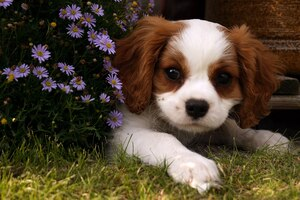

In [ ]:
fn = Path('samples/puppy.jpg')
display.Image(filename=fn, width=200)

We create a `Chat` object as before:

In [ ]:
chat = Chat(model)

Claudette expects images as a list of bytes, so we read in the file:

In [ ]:
img = fn.read_bytes()

Prompts to Claudette can be lists, containing text, images, or both, eg:

In [ ]:
chat([img, "In brief, what color flowers are in this image?"])

The flowers in this image are purple. They appear to be small, daisy-like flowers, possibly asters or some type of purple daisy, blooming in the background behind the adorable puppy in the foreground.

<details>

- id: `msg_01XtkdWMWHVppHqtiv7gdmtA`
- content: `[{'text': 'The flowers in this image are purple. They appear to be small, daisy-like flowers, possibly asters or some type of purple daisy, blooming in the background behind the adorable puppy in the foreground.', 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 110, 'output_tokens': 50, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

The image is included as input tokens.

In [ ]:
chat.use

In: 110; Out: 50; Total: 160

Alternatively, Claudette supports creating a multi-stage chat with separate image and text prompts. For instance, you can pass just the image as the initial prompt (in which case Claude will make some general comments about what it sees), and then follow up with questions in additional prompts:

In [ ]:
chat = Chat(model)
chat(img)

This image shows an adorable puppy lying in the grass. The puppy appears to be a Cavalier King Charles Spaniel or a similar breed, with distinctive white and reddish-brown fur coloring. Its face is predominantly white with large, expressive eyes and a small black nose.

The puppy is resting on a grassy surface, and behind it, you can see some purple flowers, likely asters or michaelmas daisies. These flowers provide a lovely contrast to the puppy's fur colors. In the background, there seems to be a wooden structure, possibly a fence or the side of a building, giving the scene a rustic, outdoor feel.

The composition of the image is quite charming, with the puppy as the main focus in the foreground and the flowers adding a soft, colorful backdrop. The lighting appears natural, highlighting the puppy's soft fur and the delicate petals of the flowers. Overall, it's a heartwarming scene that captures the innocence and cuteness of a young dog in a picturesque outdoor setting.

<details>

- id: `msg_01Simo36wFes3M21SXZFGBT2`
- content: `[{'text': "This image shows an adorable puppy lying in the grass. The puppy appears to be a Cavalier King Charles Spaniel or a similar breed, with distinctive white and reddish-brown fur coloring. Its face is predominantly white with large, expressive eyes and a small black nose.\n\nThe puppy is resting on a grassy surface, and behind it, you can see some purple flowers, likely asters or michaelmas daisies. These flowers provide a lovely contrast to the puppy's fur colors. In the background, there seems to be a wooden structure, possibly a fence or the side of a building, giving the scene a rustic, outdoor feel.\n\nThe composition of the image is quite charming, with the puppy as the main focus in the foreground and the flowers adding a soft, colorful backdrop. The lighting appears natural, highlighting the puppy's soft fur and the delicate petals of the flowers. Overall, it's a heartwarming scene that captures the innocence and cuteness of a young dog in a picturesque outdoor setting.", 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 98, 'output_tokens': 232, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

In [ ]:
chat('What direction is the puppy facing?')

The puppy in the image is facing towards the left side of the frame. Its head is turned slightly, allowing us to see most of its face, including both eyes, its nose, and part of its mouth. The puppy's body is angled diagonally, with its front paws visible and resting on the grass. This positioning gives the viewer a good look at the puppy's adorable facial features and the distinctive coloring of its fur, while also creating an engaging composition within the photograph.

<details>

- id: `msg_019YhPzDxXXjrcpjaS6G8fmF`
- content: `[{'text': "The puppy in the image is facing towards the left side of the frame. Its head is turned slightly, allowing us to see most of its face, including both eyes, its nose, and part of its mouth. The puppy's body is angled diagonally, with its front paws visible and resting on the grass. This positioning gives the viewer a good look at the puppy's adorable facial features and the distinctive coloring of its fur, while also creating an engaging composition within the photograph.", 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 341, 'output_tokens': 108, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

In [ ]:
chat('What color is it?')

The puppy in the image has a combination of two main colors:

1. White: The majority of its face, including the area around its eyes, muzzle, and part of its chest, is white.

2. Reddish-brown: This color, often referred to as "chestnut" or "ruby" in Cavalier King Charles Spaniels, covers the puppy's ears and extends to patches on its body.

The contrast between these two colors is quite striking and typical of the Cavalier King Charles Spaniel breed. The white fur appears bright and clean, while the reddish-brown areas have a rich, warm tone. This color combination, along with the puppy's expressive eyes and small black nose, contributes to its incredibly cute and appealing appearance.

<details>

- id: `msg_01WVxHA2sAff5q1En3q9km8F`
- content: `[{'text': 'The puppy in the image has a combination of two main colors:\n\n1. White: The majority of its face, including the area around its eyes, muzzle, and part of its chest, is white.\n\n2. Reddish-brown: This color, often referred to as "chestnut" or "ruby" in Cavalier King Charles Spaniels, covers the puppy\'s ears and extends to patches on its body.\n\nThe contrast between these two colors is quite striking and typical of the Cavalier King Charles Spaniel breed. The white fur appears bright and clean, while the reddish-brown areas have a rich, warm tone. This color combination, along with the puppy\'s expressive eyes and small black nose, contributes to its incredibly cute and appealing appearance.', 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 457, 'output_tokens': 175, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

Note that the image is passed in again for every input in the dialog, so that number of input tokens increases quickly with this kind of chat. (For large images, using prompt caching might be a good idea.)

In [ ]:
chat.use

In: 896; Out: 515; Total: 1411

## Other model providers

You can also use 3rd party providers of Anthropic models, as shown here.

### Amazon Bedrock

These are the models available through Bedrock:

In [ ]:
models_aws

('anthropic.claude-3-haiku-20240307-v1:0',
 'anthropic.claude-3-sonnet-20240229-v1:0',
 'anthropic.claude-3-opus-20240229-v1:0',
 'anthropic.claude-3-5-sonnet-20240620-v1:0')

To use them, call `AnthropicBedrock` with your access details, and pass that to `Client`:

In [ ]:
from anthropic import AnthropicBedrock

In [ ]:
ab = AnthropicBedrock(
    aws_access_key=os.environ['AWS_ACCESS_KEY'],
    aws_secret_key=os.environ['AWS_SECRET_KEY'],
)
client = Client(models_aws[-1], ab)

Now create your `Chat` object passing this client to the `cli` parameter -- and from then on, everything is identical to the previous examples.

In [ ]:
chat = Chat(cli=client)
chat("I'm Jeremy")

Hello Jeremy! It's nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?

<details>

- id: `msg_bdrk_01VFVE1Pe5LNubaWYKC1sz8f`
- content: `[{'text': "Hello Jeremy! It's nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?", 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 10, 'output_tokens': 36}`

</details>

### Google Vertex

These are the models available through Vertex:

In [ ]:
models_goog

('claude-3-haiku@20240307',
 'claude-3-sonnet@20240229',
 'claude-3-opus@20240229',
 'claude-3-5-sonnet@20240620')

To use them, call `AnthropicVertex` with your access details, and pass that to `Client`:

In [ ]:
from anthropic import AnthropicVertex
import google.auth

In [ ]:
project_id = google.auth.default()[1]
gv = AnthropicVertex(project_id=project_id, region="us-east5")
client = Client(models_goog[-1], gv)

In [ ]:
chat = Chat(cli=client)
chat("I'm Jeremy")

Hello Jeremy! It's nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?

<details>

- id: `msg_vrtx_01P251BUJXBBvihsvb3VVgZ3`
- content: `[{'text': "Hello Jeremy! It's nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?", 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 10, 'output_tokens': 36}`

</details>